# MS-SSIM - Multiscale Structural Similarity Index

libvmaf is integrated into FFmpeg, to create complex filters to calculate MS-SSIM. 

In [1]:
! mkdir -p results/msssim && \
ffmpeg -r 25 -i videos/dist/vp9/VCR720_30.webm \
       -r 25 -i videos/ref/VCR.mp4 \
       -lavfi "[0:v]scale=1280x960:flags=bicubic,setpts=PTS-STARTPTS[distorted]; \
            [1:v]setpts=PTS-STARTPTS[reference]; \
            [distorted][reference]libvmaf=log_fmt=json:log_path=results/msssim/bbb_msssim_scaled.json:model='path=/vmaf/model/vmaf_float_v0.6.1.json':ms_ssim=1" -f null -   

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.2.1 (Alpine 12.2.1_git20220924-r4) 20220924
  configuration: --pkg-config-flags=--static --extra-cflags=-fopenmp --extra-ldflags='-fopenmp -Wl,-z,stack-size=2097152' --toolchain=hardened --disable-debug --disable-shared --disable-ffplay --enable-static --enable-gpl --enable-version3 --enable-nonfree --enable-fontconfig --enable-gray --enable-iconv --enable-libaom --enable-libdav1d --enable-libdavs2 --enable-libfreetype --enable-libfribidi --enable-libkvazaar --enable-libopenjpeg --enable-librav1e --enable-libsnappy --enable-libsoxr --enable-libsvtav1 --enable-libtheora --enable-libuavs3d --enable-libvmaf --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --enable-openssl
  libavutil      57. 28.100 / 57. 28.100
  libavcodec     59. 37.100 / 59. 37.100
  libavformat    59. 27.100 / 59. 27.100
  libavdevice    59

## Graphical representation.

In this section, we plot the MS-SSIM values obtained per frame of the result obtained in Example 1. The arithmetic mean of the obtained values is also shown. 

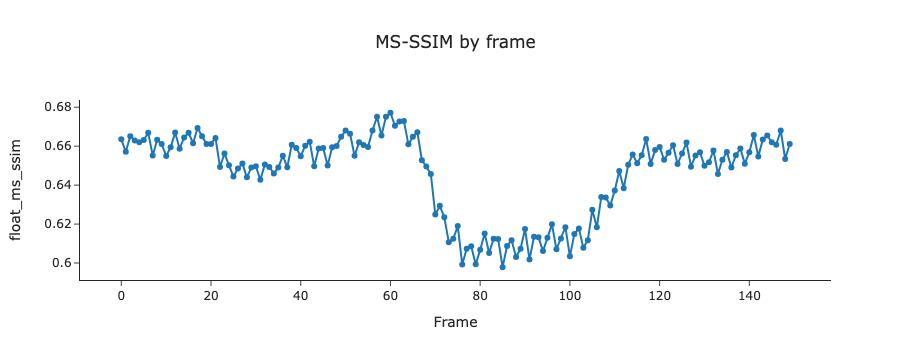

In [3]:
import pandas as pd
import json
import plotly.express as px

path_file='results/msssim/bbb_msssim_scaled.json'

with open(path_file) as f:
  data = json.load(f)

msssim_frames=[]

for frame in data['frames']:
    msssim_frames.append(frame['metrics']['float_ms_ssim'])
        
df=pd.DataFrame(msssim_frames, columns=['float_ms_ssim'])

fig = px.line(df,x=df.index, y='float_ms_ssim',
              title='MS-SSIM by frame',labels={"index": "Frame"}, template='simple_white', markers=True)


fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center'},
    showlegend=True)

fig.show()